In [7]:
# =============================================
# 1️⃣ Imports
# =============================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score, roc_auc_score, classification_report, ConfusionMatrixDisplay, RocCurveDisplay

# Models
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


In [8]:
# =============================================
# 2️⃣ Load dataset
# =============================================
df_raw = pd.read_csv("data/survey.csv")

print("=== BEFORE CLEANING ===")
print(df_raw.shape)
print(df_raw.info())
display(df_raw.head())
display(df_raw.tail())

# Drop unnecessary columns
df_clean = df_raw.drop(columns=['comments','state','Timestamp'], errors='ignore')

# Encode categorical columns
le = LabelEncoder()
for col in df_clean.select_dtypes(include=['object']).columns:
    df_clean[col] = df_clean[col].astype(str).str.strip()
    df_clean[col] = le.fit_transform(df_clean[col])

# Impute missing values
imputer = SimpleImputer(strategy='most_frequent')
df_clean = pd.DataFrame(imputer.fit_transform(df_clean), columns=df_clean.columns)

print("=== AFTER CLEANING ===")
print(df_clean.shape)
print(df_clean.info())
display(df_clean.head())
display(df_clean.tail())

=== BEFORE CLEANING ===
(1259, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN
1258,2016-02-01 23:04:31,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,...,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


=== AFTER CLEANING ===
(1259, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Age                        1259 non-null   int64
 1   Gender                     1259 non-null   int64
 2   Country                    1259 non-null   int64
 3   self_employed              1259 non-null   int64
 4   family_history             1259 non-null   int64
 5   treatment                  1259 non-null   int64
 6   work_interfere             1259 non-null   int64
 7   no_employees               1259 non-null   int64
 8   remote_work                1259 non-null   int64
 9   tech_company               1259 non-null   int64
 10  benefits                   1259 non-null   int64
 11  care_options               1259 non-null   int64
 12  wellness_program           1259 non-null   int64
 13  seek_help                  1259 non-null   i

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,10,45,2,0,1,1,4,0,1,...,2,2,1,1,1,2,1,0,2,0
1,44,15,45,2,0,0,2,5,0,0,...,0,0,0,1,0,0,1,1,0,0
2,32,19,7,2,0,0,2,4,0,1,...,0,1,1,1,2,2,2,2,1,0
3,31,19,44,2,1,1,1,2,0,1,...,1,1,2,2,1,0,0,0,1,1
4,31,19,45,2,0,0,0,1,1,1,...,0,0,1,1,1,2,2,2,0,0


,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
1254,26,37,44,0,0,1,4,2,0,1,...,0,2,1,1,1,1,1,1,0,0
1255,32,19,45,0,1,1,1,2,1,1,...,2,1,1,1,1,2,1,1,2,0
1256,34,37,45,0,1,1,3,5,0,1,...,0,1,2,2,0,0,1,1,1,0
1257,46,31,45,0,0,0,4,1,1,1,...,0,0,2,1,0,0,1,1,1,0
1258,25,19,45,0,1,1,3,2,0,0,...,2,0,0,1,1,0,1,1,0,0


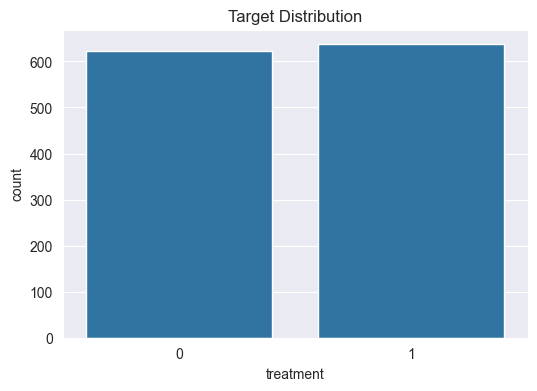

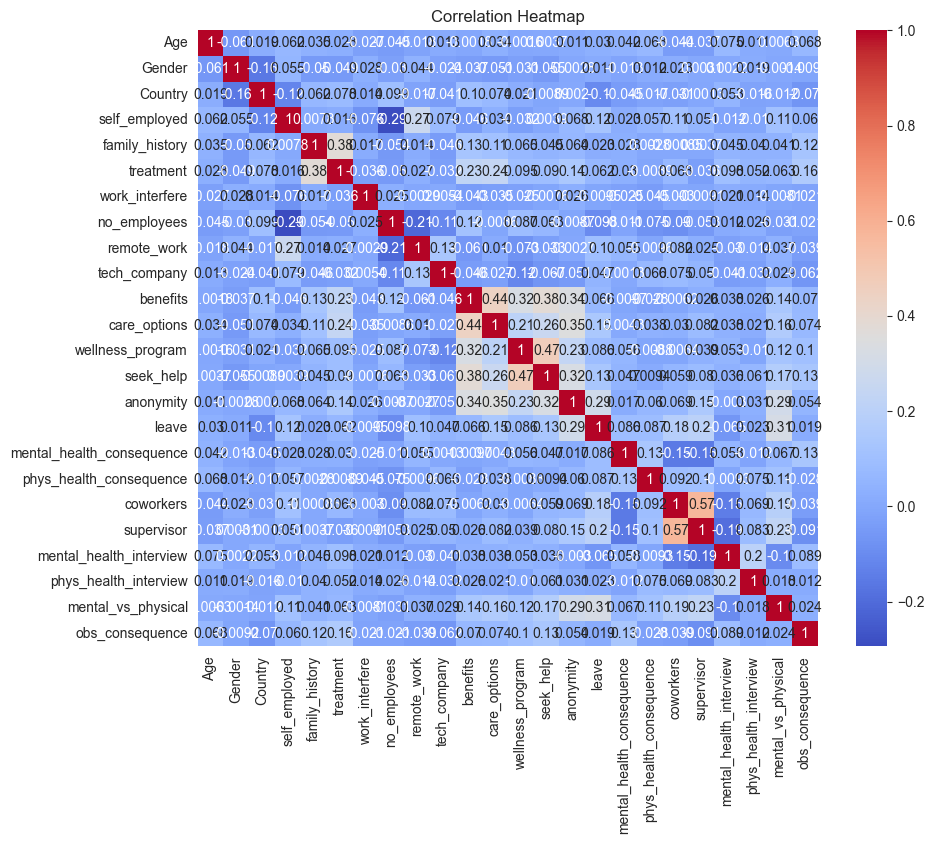

In [9]:
# =============================================
# 3️⃣ Visualizations
# =============================================
# Target distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df_clean, x='treatment')
plt.title("Target Distribution")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df_clean.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [10]:
# =============================================
# 4️⃣ Train/Test Split and Scaling
# =============================================
X = df_clean.drop(columns='treatment')
y = df_clean['treatment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# =============================================
# 5️⃣ Train all models and compute metrics
# =============================================
models_dict = {
    "Logistic": LogisticRegression(max_iter=1000),
    "Perceptron": Perceptron(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "MLP": MLPClassifier(max_iter=1000)
}

f1_scores = []
roc_auc_scores = []

for name, clf in models_dict.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    f1_scores.append(f1_score(y_test, y_pred))
    roc_auc_scores.append(roc_auc_score(y_test, y_pred))
    print(f"{name} F1-score: {f1_scores[-1]:.3f}, ROC-AUC: {roc_auc_scores[-1]:.3f}")

Logistic F1-score: 0.724, ROC-AUC: 0.730
Perceptron F1-score: 0.538, ROC-AUC: 0.525
Decision Tree F1-score: 0.713, ROC-AUC: 0.722
Random Forest F1-score: 0.817, ROC-AUC: 0.814
MLP F1-score: 0.724, ROC-AUC: 0.730


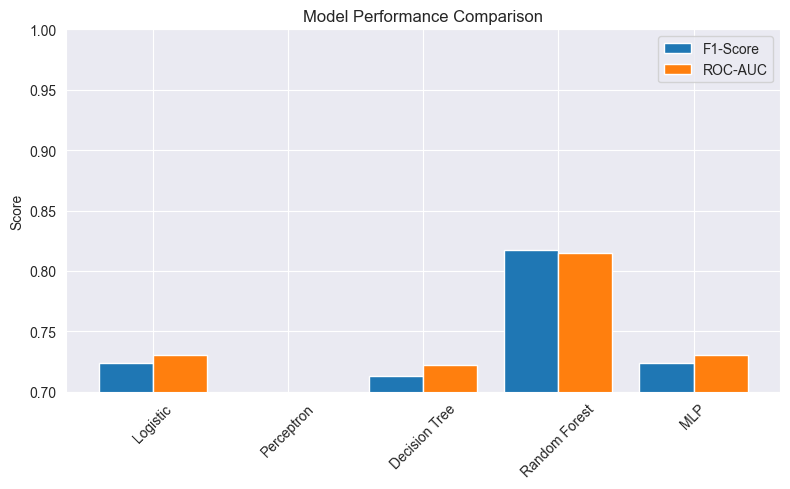

In [12]:
# =============================================
# 6️⃣ Plot model comparison dynamically
# =============================================
x = range(len(models_dict))
plt.figure(figsize=(8,5))
plt.bar(x, f1_scores, width=0.4, label="F1-Score", align='center')
plt.bar([i + 0.4 for i in x], roc_auc_scores, width=0.4, label="ROC-AUC", align='center')
plt.xticks([i + 0.2 for i in x], list(models_dict.keys()), rotation=45)
plt.ylim(0.7, 1.0)
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.tight_layout()
plt.show()

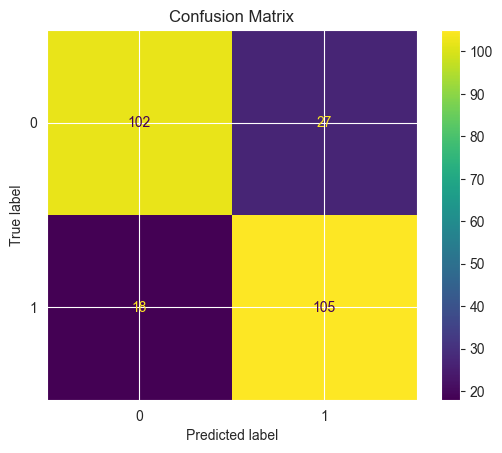

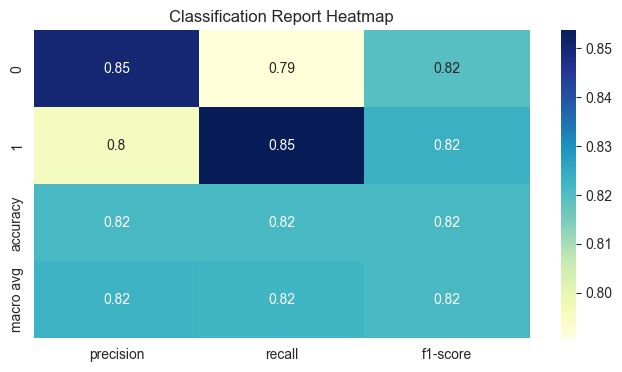

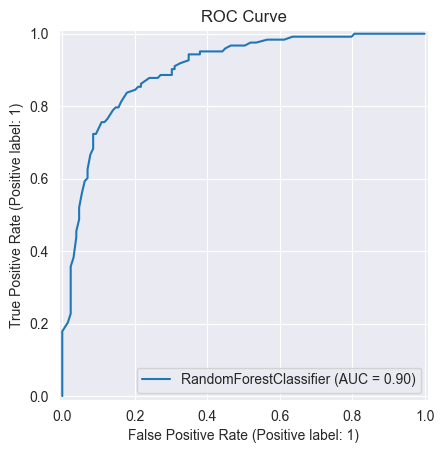

In [13]:
# =============================================
# 7️⃣ Confusion Matrix, Classification Report, ROC for main model
# =============================================
# Use Random Forest as main model (best performing)
main_model = RandomForestClassifier()
main_model.fit(X_train_scaled, y_train)
y_pred_main = main_model.predict(X_test_scaled)

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(main_model, X_test_scaled, y_test)
plt.title("Confusion Matrix")
plt.show()

# Classification report
report = classification_report(y_test, y_pred_main, output_dict=True)
df_report = pd.DataFrame(report).transpose()
plt.figure(figsize=(8,4))
sns.heatmap(df_report.iloc[:-1,:-1], annot=True, cmap="YlGnBu")
plt.title("Classification Report Heatmap")
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(main_model, X_test_scaled, y_test)
plt.title("ROC Curve")
plt.show()